### Task 4

### Email spam Detection with Machine Learning

###

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('./spam.csv',delimiter=',',encoding='ISO-8859-1')

In [3]:
df=pd.read_csv('./spam.csv',encoding='latin1')


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

In [9]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Considering the substantial number of missing entries, exceeding 99%, in columns Unnamed:2, Unnamed:3, and Unnamed:4, it is imperative to eliminate these columns from the dataset.

In [10]:
df=df[['v1','v2']]

In [11]:
df.columns=['spam/ham','message']

In [12]:
df.shape

(5572, 2)

In [13]:
# convert the categorical to numerical data
df['spam/ham'] = df['spam/ham'].map({'spam': 0, 'ham': 1})

In [14]:
df.head()

,spam/ham,message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


### Data Preprocessing

In [15]:
df.duplicated().sum()

403

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
pd.options.mode.chained_assignment = None  # Disable the warning

In [19]:
df.shape

(5169, 2)

### converting into train and test data

In [20]:
x=df['message']
y=df['spam/ham']
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5169, dtype: object

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [23]:
x_train.shape,x_test.shape

((4135,), (1034,))

### Considering the nature of machine learning algorithms, which excel with numerical input, the conversion of text data into numerical format becomes essential. To achieve this, I will employ the TfidfVectorizer technique from the feature_extraction module in sklearn.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
vectorizer= TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
vectorizer

TfidfVectorizer(stop_words='english')

In [26]:
y_train = y_train.map(int)
y_test = y_test.map(int)


In [27]:
x_train= vectorizer.fit_transform(x_train)

In [28]:
x_test= vectorizer.transform(x_test)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [30]:
models = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier()
}

In [31]:
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    print("\n" + "="*50 + "\n")

Model: Multinomial Naive Bayes
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83       140
           1       0.96      1.00      0.98       894

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034



Model: Logistic Regression
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83       140
           1       0.96      1.00      0.98       894

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034



Model: Support Vector Machine
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90       140
           1       0.97      1.

In [32]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

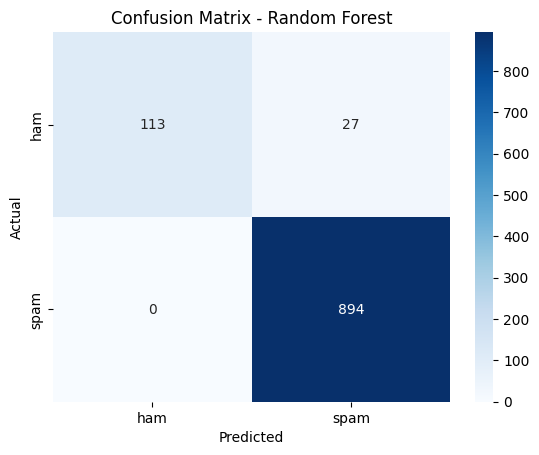

In [33]:
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=['ham','spam'],yticklabels=['ham','spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### Conclusion

### As demonstrated earlier, our machine learning model relied on meticulously labeled data for effective training, enabling it to accurately categorize new incoming emails. This underscores the critical importance of precise data tagging. A single misclassification could significantly impact the model's performance, akin to instances where emails in your inbox are mistakenly identified as spam. Your discernment in accurately labeling emails, particularly when reporting them as spam, contributes to the model's ongoing refinement and benefits others facing similar emails. It's crucial to exercise caution in spam tagging, as an erroneous decision may lead to genuine emails being incorrectly classified. This highlights the responsibility of users to judiciously evaluate and label emails, ensuring the effectiveness and reliability of machine learning-based spam detection systems.